



# Premier League Player Statistics 

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import regex as re
import seaborn as sns
from IPython.display import Image as im
from math import pi
from matplotlib.sankey import Sankey
from PIL import Image
import math

In [2]:
#importamos los datos
df = pd.read_csv('../input/premier-league-player-statistics-updated-daily/dataset - 2020-09-24.csv', sep= ',')

In [3]:
#notamos que tiene muchas columnas por lo que este codigo nos permitira verlas todas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df.head()

Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances  Wins  Losses  Goals  Goals per match  Headed goals  \
0           64    28      16      0              NaN           NaN   
1            0     0       0      0              NaN           NaN   
2            0     0       0      0              NaN           NaN   
3          160    90      37      7              NaN           0.0   
4           16     7       5      1              NaN           0.0   

   Goals with right foot  Goals with left foot  Penalties scored  \
0                    NaN                   NaN               NaN   
1                    NaN                   NaN               NaN   
2                    NaN                   NaN               NaN   
3                    4.0                   3.0               NaN   
4                    0.0                   1.0               NaN   

   Freekicks scored  Shots  Shots on target Shooting accuracy %  Hit woodwork  \
0               NaN    NaN              NaN                 NaN           NaN   
1               NaN    NaN              NaN                 NaN           NaN   
2               NaN    NaN              NaN                 NaN           NaN   
3               NaN    NaN              NaN                 NaN           3.0   
4               NaN    NaN              NaN                 NaN           0.0   

   Big chances missed  Clean sheets  Goals conceded  Tackles Tackle success %  \
0                 NaN          14.0            82.0      NaN              NaN   
1                 NaN           0.0             0.0      NaN              NaN   
2                 NaN           0.0             0.0      NaN              NaN   
3                 NaN          53.0           166.0    214.0              78%   
4                 NaN           2.0            16.0     21.0              81%   

   Last man tackles  Blocked shots  Interceptions  Clearances  \
0               NaN            NaN            NaN         NaN   
1               NaN            NaN            NaN         NaN   
2               NaN            NaN            NaN         NaN   
3               1.0           32.0          208.0       304.0   
4               0.0            1.0           12.0        32.0   

   Headed Clearance  Clearances off line  Recoveries  Duels won  Duels lost  \
0               NaN                  NaN         NaN        NaN         NaN   
1               NaN                  NaN         NaN        NaN         NaN   
2               NaN                  NaN         NaN        NaN         NaN   
3             143.0                  3.0       732.0      611.0       709.0   
4              12.0                  0.0        63.0       55.0        38.0   

   Successful 50/50s  Aerial battles won  Aerial battles lost  Own goals  \
0                NaN                 NaN                  NaN        0.0   
1                NaN                 NaN                  NaN        0.0   
2                NaN                 NaN                  NaN        0.0   
3              196.0               161.0                215.0        1.0   
4               12.0                10.0                 16.0        0.0   

   Errors leading to goal  Assists  Passes  Passes per match  \
0                     7.0        0    1783             27.86   
1                     0.0        0       0              0.00   
2                     0.0        0       0              0.00   
3                     1.0       18    7125             44.53   
4                     0.0        1     519             32.44   

   Big chances creat

In [5]:
df.describe(include="all")

Name  Jersey Number       Club    Position Nationality  \
count           571     563.000000        571         571         570   
unique          571            NaN         20           4          57   
top     Ryan Fraser            NaN  Liverpool  Midfielder     England   
freq              1            NaN         34         198         221   
mean            NaN      19.534636        NaN         NaN         NaN   
std             NaN      14.273515        NaN         NaN         NaN   
min             NaN       1.000000        NaN         NaN         NaN   
25%             NaN       8.000000        NaN         NaN         NaN   
50%             NaN      18.000000        NaN         NaN         NaN   
75%             NaN      27.000000        NaN         NaN         NaN   
max             NaN      82.000000        NaN         NaN         NaN   

               Age  Appearances        Wins      Losses       Goals  \
count   570.000000   571.000000  571.000000  571.000000  571.000000   
unique         NaN          NaN         NaN         NaN         NaN   
top            NaN          NaN         NaN         NaN         NaN   
freq           NaN          NaN         NaN         NaN         NaN   
mean     25.789474    68.823117   28.957968   23.896673    7.327496   
std       4.377354    81.797516   38.969376   28.488376   16.810490   
min      17.000000     0.000000    0.000000    0.000000    0.000000   
25%      22.000000     3.000000    1.000000    1.000000    0.000000   
50%      26.000000    36.000000   12.000000   14.000000    1.000000   
75%      29.000000   108.000000   41.000000   36.000000    6.000000   
max      38.000000   539.000000  272.000000  158.000000  180.000000   

        Goals per match  Headed goals  Goals with right foot  \
count        309.000000    502.000000             502.000000   
unique              NaN           NaN                    NaN   
top                 NaN           NaN                    NaN   
freq                NaN           NaN                    NaN   
mean           2.648414      1.414343               4.468127   
std            8.002117      3.433374              11.048341   
min            0.000000      0.000000               0.000000   
25%            0.050000      0.000000               0.000000   
50%            0.140000      0.000000               1.000000   
75%            0.390000      1.000000               3.000000   
max           57.000000     31.000000             127.000000   

        Goals with left foot  Penalties scored  Freekicks scored       Shots  \
count             502.000000        309.000000        309.000000  309.000000   
unique                   NaN               NaN               NaN         NaN   
top                      NaN               NaN               NaN         NaN   
freq                     NaN               NaN               NaN         NaN   
mean                2.388446          0.974110          0.291262  102.504854   
std                 6.295652          3.355453          0.989862  144.955336   
min                 0.000000          0.000000          0.000000    0.000000   
25%                 0.000000          0.000000          0.000000    6.000000   
50%                 0.000000          0.000000          0.000000   41.000000   
75%                 2.000000          0.000000          0.000000  144.000000   
max                63.000000         27.000000          8.000000  996.000000   

        Shots on target Shooting accuracy %  Hit woodwork  Big chances missed  \
count        309.000000                 309    502.000000          309.000000   
unique              NaN                  50           NaN                 NaN   
top                 NaN                  0%           NaN                 NaN   
freq                NaN                  44           NaN                 NaN   
mean          36.915858                 NaN      2.061753            9.029126   
std           57.506911                 NaN      3.881757           1

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


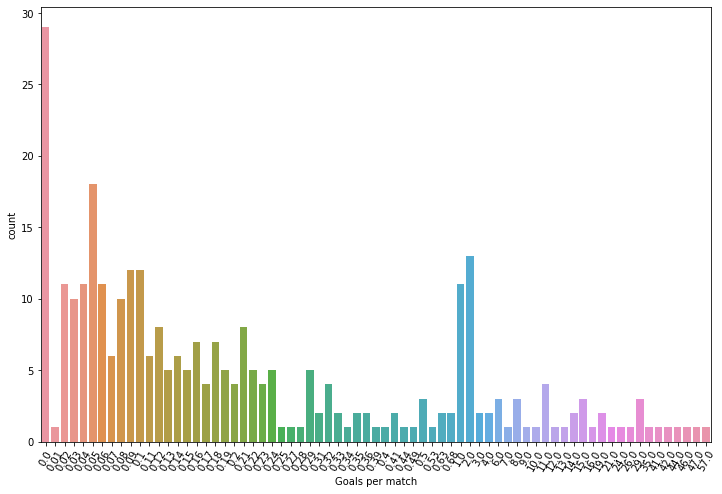

In [6]:
#En esta grfica podemos ver que hay muchos outliers ya que hay jugadores con goles por partido demasiado altos, imposible para un jugador de fútbol 
plt.figure(figsize =(12, 8))
sns.countplot("Goals per match", data=df)
plt.xticks(rotation=60)
display()

In [7]:
#utilizaremos como maximo 3,5 goles por partido
df_goals_p_match=df[df["Goals per match"] > 3.5]
print(df_goals_p_match.index)

Int64Index([ 16,  18,  22,  46,  48,  52,  55,  74,  79, 106, 136, 164, 189,
            193, 194, 203, 218, 220, 221, 223, 240, 274, 275, 279, 285, 306,
            309, 315, 318, 326, 332, 426, 430, 454, 482, 485, 507, 531],
           dtype='int64')


In [8]:
#las filas con goles por partido mayores a 3,5 las eliminaremos
df=df.drop(df.index[[16,  18,  22,  46,  48,  52,  55,  74,  79, 106, 136, 164, 189,
            193, 194, 203, 218, 220, 221, 223, 240, 274, 275, 279, 285, 306,
            309, 315, 318, 326, 332, 426, 430, 454, 482, 485, 507, 531]])

In [9]:
#notamos que muchas columnas cuando estan vacias dice Nan, esto nos dificulta trabajar por lo que lo cambiaremos por 0
df["Goals"].fillna(0, inplace = True)
df["Goals with right foot"].fillna(0, inplace = True)
df["Goals per match"].fillna(0, inplace = True)
df["Goals with left foot"].fillna(0, inplace = True)
df["Shots"].fillna(0, inplace = True)
df["Shots on target"].fillna(0, inplace = True)
df["Hit woodwork"].fillna(0, inplace = True)
df["Big chances missed"].fillna(0, inplace = True)
df["Clean sheets"].fillna(0, inplace = True)
df["Goals conceded"].fillna(0, inplace = True)
df["Freekicks scored"].fillna(0,inplace= True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


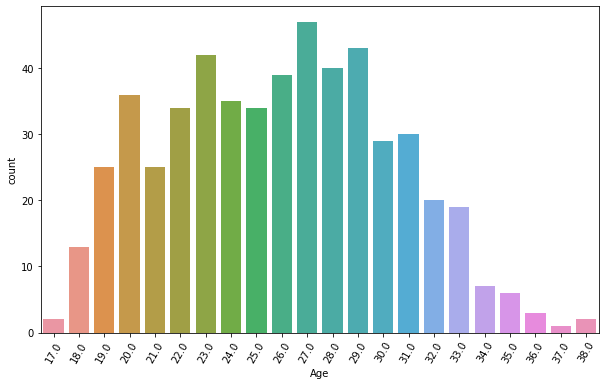

In [10]:
#observamos la edad de los jugadores y vemos que no hay nada fuera de lo normal
plt.figure(figsize =(10, 6))
sns.countplot("Age", data=df)
plt.xticks(rotation=60)
display()

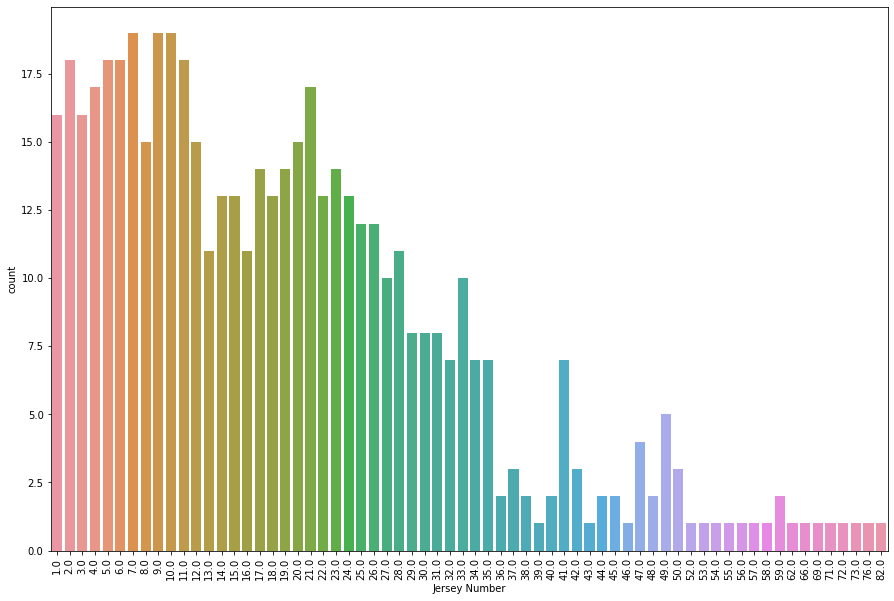

In [11]:
#los numeros mas populares son el 7, 9 y 10
plt.figure(figsize =(15, 10))
sns.countplot(x = "Jersey Number", data=df)
plt.xticks(rotation=90)
display()

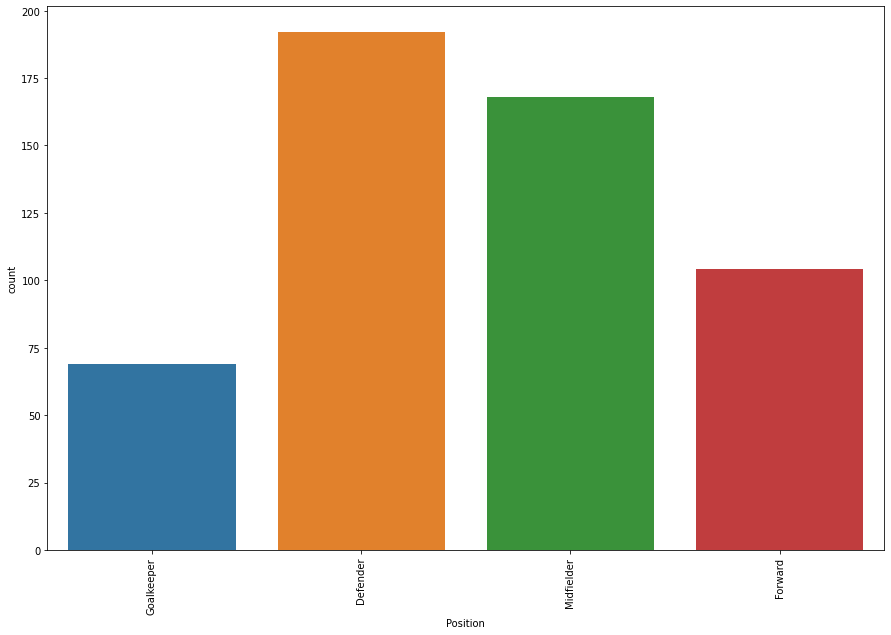

In [12]:
#defensor es la posicion mas frecuente
plt.figure(figsize =(15, 10))
sns.countplot(x = "Position", data=df)
plt.xticks(rotation=90)
display()

In [13]:
df.describe(include="all")

Name  Jersey Number               Club  Position Nationality  \
count             533     526.000000                533       533         532   
unique            533            NaN                 20         4          55   
top     Peter Gwargis            NaN  Manchester-United  Defender     England   
freq                1            NaN                 31       192         209   
mean              NaN      19.252852                NaN       NaN         NaN   
std               NaN      14.322102                NaN       NaN         NaN   
min               NaN       1.000000                NaN       NaN         NaN   
25%               NaN       8.000000                NaN       NaN         NaN   
50%               NaN      17.000000                NaN       NaN         NaN   
75%               NaN      27.000000                NaN       NaN         NaN   
max               NaN      82.000000                NaN       NaN         NaN   

               Age  Appearances        Wins      Losses       Goals  \
count   532.000000   533.000000  533.000000  533.000000  533.000000   
unique         NaN          NaN         NaN         NaN         NaN   
top            NaN          NaN         NaN         NaN         NaN   
freq           NaN          NaN         NaN         NaN         NaN   
mean     25.898496    72.337711   30.491557   25.061914    7.849906   
std       4.411191    83.480820   39.843614   29.101228   17.282047   
min      17.000000     0.000000    0.000000    0.000000    0.000000   
25%      22.000000     2.000000    1.000000    1.000000    0.000000   
50%      26.000000    40.000000   14.000000   15.000000    1.000000   
75%      29.000000   115.000000   45.000000   39.000000    7.000000   
max      38.000000   539.000000  272.000000  158.000000  180.000000   

        Goals per match  Headed goals  Goals with right foot  \
count        533.000000    464.000000             533.000000   
unique              NaN           NaN                    NaN   
top                 NaN           NaN                    NaN   
freq                NaN           NaN                    NaN   
mean           0.143265      1.530172               4.208255   
std            0.384988      3.546537              10.772588   
min            0.000000      0.000000               0.000000   
25%            0.000000      0.000000               0.000000   
50%            0.000000      0.000000               0.000000   
75%            0.120000      1.000000               3.000000   
max            3.000000     31.000000             127.000000   

        Goals with left foot  Penalties scored  Freekicks scored       Shots  \
count             533.000000        271.000000        533.000000  533.000000   
unique                   NaN               NaN               NaN         NaN   
top                      NaN               NaN               NaN         NaN   
freq                     NaN               NaN               NaN         NaN   
mean                2.249531          1.110701          0.168856   58.649156   
std                 6.135042          3.562500          0.766796  121.672905   
min                 0.000000          0.000000          0.000000    0.000000   
25%                 0.000000          0.000000          0.000000    0.000000   
50%                 0.000000          0.000000          0.000000    0.000000   
75%                 2.000000          0.000000          0.000000   51.000000   
max                63.000000         27.000000          8.000000  996.000000   

        Shots on target Shooting accuracy %  Hit woodwork  Big chances missed  \
count        533.000000                 271    533.000000          533.000000   
unique              NaN                  45           NaN                 NaN   
top                 NaN                  0%           NaN                 NaN   
freq                NaN                  42           NaN                 NaN   
mean          21.234522                 NaN      1.93245

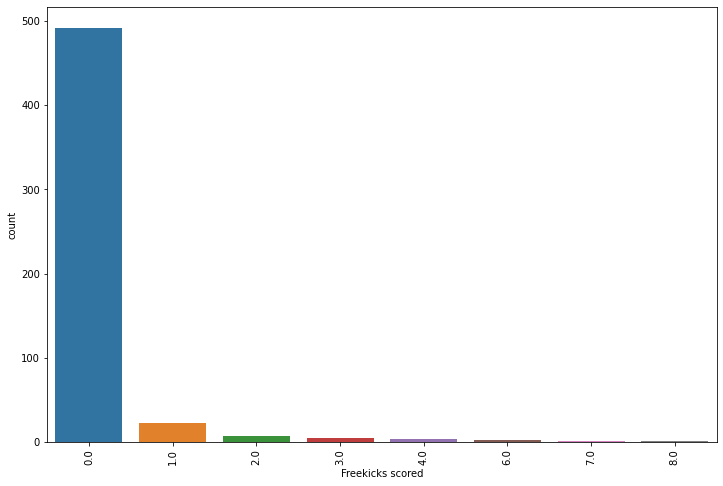

In [14]:
plt.figure(figsize =(12, 8))
sns.countplot(x = "Freekicks scored", data=df)
plt.xticks(rotation=90)
display()

In [15]:
#En el describe pudimos ver que la columna nationality tiene un missing value, por lo que eliminaremos esa fila
a=df["Nationality"].isna()== True
df[a]

Name  Jersey Number          Club    Position Nationality  Age  \
241  Ezgjan Alioski           10.0  Leeds-United  Midfielder         NaN  NaN   

     Appearances  Wins  Losses  Goals  Goals per match  Headed goals  \
241            1     1       0      0              1.0           0.0   

     Goals with right foot  Goals with left foot  Penalties scored  \
241                    0.0                   0.0               0.0   

     Freekicks scored  Shots  Shots on target Shooting accuracy %  \
241               0.0    1.0              1.0                100%   

     Hit woodwork  Big chances missed  Clean sheets  Goals conceded  Tackles  \
241           0.0                 0.0           0.0             0.0      1.0   

    Tackle success %  Last man tackles  Blocked shots  Interceptions  \
241             100%               NaN            0.0            1.0   

     Clearances  Headed Clearance  Clearances off line  Recoveries  Duels won  \
241         0.0               0.0                  NaN         2.0        2.0   

     Duels lost  Successful 50/50s  Aerial battles won  Aerial battles lost  \
241         4.0                0.0                 0.0                  1.0   

     Own goals  Errors leading to goal  Assists  Passes  Passes per match  \
241        NaN                     0.0        0      11              11.0   

     Big chances created  Crosses Cross accuracy %  Through balls  \
241                  0.0      1.0               1%            0.0   

     Accurate long balls  Saves  Penalties saved  Punches  High Claims  \
241                  0.0    NaN              NaN      NaN          NaN   

     Catches  Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  \
241      NaN                 NaN         NaN         NaN             0   

     Red cards  Fouls  Offsides  
241          0      1       0.0

In [16]:
#eliminamos la fila
df=df.drop([241],axis=0)

<AxesSubplot:>

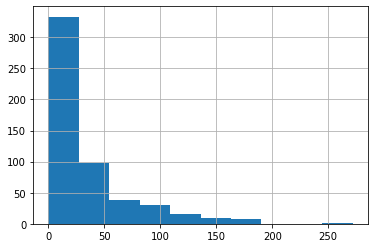

In [17]:
df["Wins"].hist()

<AxesSubplot:>

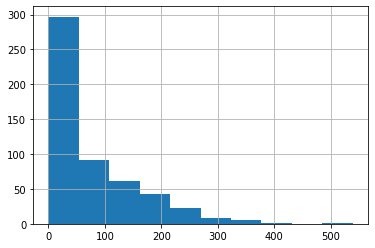

In [18]:
df["Appearances"].hist()

<AxesSubplot:>

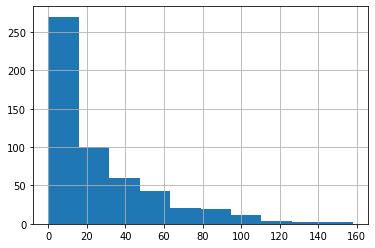

In [19]:
df["Losses"].hist()

<AxesSubplot:>

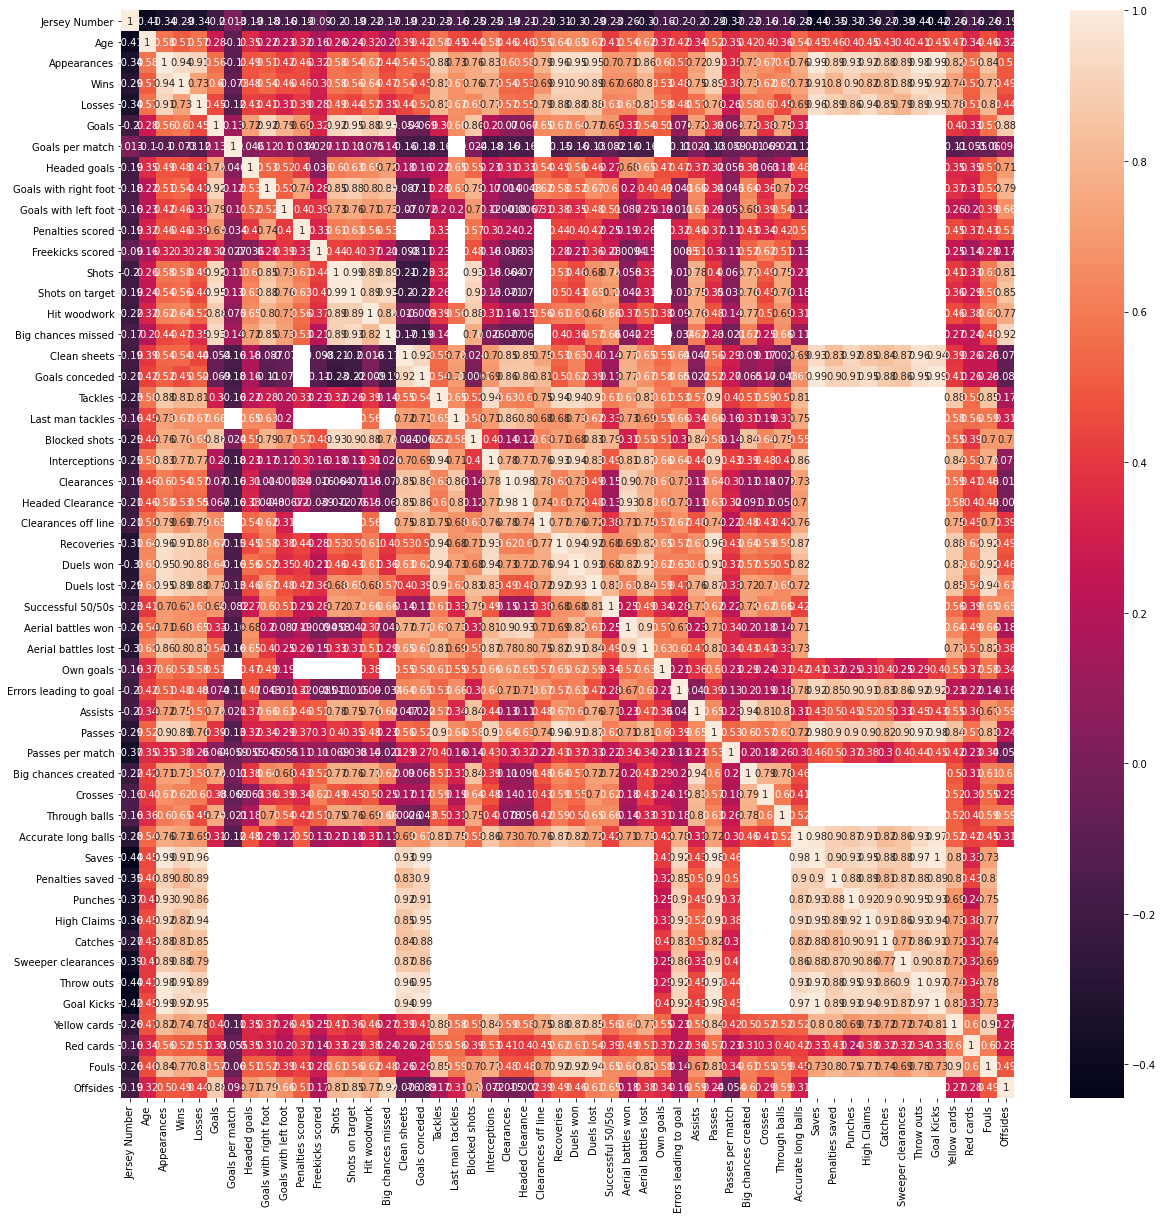

In [20]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [21]:
#creamos porcentaje de partidos ganados ya que puede sernos util
df["%wins"]= df["Wins"] / df["Appearances"]

In [22]:
df.head()

Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances  Wins  Losses  Goals  Goals per match  Headed goals  \
0           64    28      16      0              0.0           NaN   
1            0     0       0      0              0.0           NaN   
2            0     0       0      0              0.0           NaN   
3          160    90      37      7              0.0           0.0   
4           16     7       5      1              0.0           0.0   

   Goals with right foot  Goals with left foot  Penalties scored  \
0                    0.0                   0.0               NaN   
1                    0.0                   0.0               NaN   
2                    0.0                   0.0               NaN   
3                    4.0                   3.0               NaN   
4                    0.0                   1.0               NaN   

   Freekicks scored  Shots  Shots on target Shooting accuracy %  Hit woodwork  \
0               0.0    0.0              0.0                 NaN           0.0   
1               0.0    0.0              0.0                 NaN           0.0   
2               0.0    0.0              0.0                 NaN           0.0   
3               0.0    0.0              0.0                 NaN           3.0   
4               0.0    0.0              0.0                 NaN           0.0   

   Big chances missed  Clean sheets  Goals conceded  Tackles Tackle success %  \
0                 0.0          14.0            82.0      NaN              NaN   
1                 0.0           0.0             0.0      NaN              NaN   
2                 0.0           0.0             0.0      NaN              NaN   
3                 0.0          53.0           166.0    214.0              78%   
4                 0.0           2.0            16.0     21.0              81%   

   Last man tackles  Blocked shots  Interceptions  Clearances  \
0               NaN            NaN            NaN         NaN   
1               NaN            NaN            NaN         NaN   
2               NaN            NaN            NaN         NaN   
3               1.0           32.0          208.0       304.0   
4               0.0            1.0           12.0        32.0   

   Headed Clearance  Clearances off line  Recoveries  Duels won  Duels lost  \
0               NaN                  NaN         NaN        NaN         NaN   
1               NaN                  NaN         NaN        NaN         NaN   
2               NaN                  NaN         NaN        NaN         NaN   
3             143.0                  3.0       732.0      611.0       709.0   
4              12.0                  0.0        63.0       55.0        38.0   

   Successful 50/50s  Aerial battles won  Aerial battles lost  Own goals  \
0                NaN                 NaN                  NaN        0.0   
1                NaN                 NaN                  NaN        0.0   
2                NaN                 NaN                  NaN        0.0   
3              196.0               161.0                215.0        1.0   
4               12.0                10.0                 16.0        0.0   

   Errors leading to goal  Assists  Passes  Passes per match  \
0                     7.0        0    1783             27.86   
1                     0.0        0       0              0.00   
2                     0.0        0       0              0.00   
3                     1.0       18    7125             44.53   
4                     0.0        1     519             32.44   

   Big chances creat

## ¿Son los numero 9 y 10 en promedio los más goleadores?

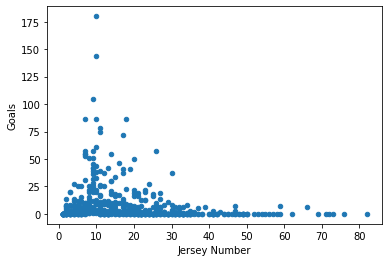

In [23]:
disp= df.plot(kind='scatter', x='Jersey Number', y='Goals')

### A través de la grafica podemos ver que los números al rededor del 10 son los que más goles hacen

In [24]:
df_jnumber=df.groupby("Jersey Number")

In [25]:
df_jnumber.describe()

Age                                                       \
              count       mean       std   min    25%   50%    75%   max   
Jersey Number                                                              
1.0            16.0  28.937500  3.530227  22.0  27.00  28.0  31.50  35.0   
2.0            18.0  25.500000  3.823303  18.0  23.00  25.5  28.75  31.0   
3.0            16.0  27.812500  3.037954  22.0  26.00  28.5  30.00  31.0   
4.0            17.0  26.705882  4.073768  19.0  24.00  28.0  29.00  32.0   
5.0            18.0  28.166667  2.874840  24.0  26.25  27.5  29.00  36.0   
6.0            18.0  28.555556  3.853527  22.0  26.00  29.0  31.00  36.0   
7.0            19.0  26.000000  4.434712  19.0  23.50  25.0  29.00  34.0   
8.0            15.0  26.533333  3.136574  22.0  24.00  26.0  29.50  32.0   
9.0            19.0  26.368421  3.076985  22.0  24.00  26.0  28.50  33.0   
10.0           18.0  27.222222  3.687109  22.0  24.00  27.5  29.75  34.0   
11.0           18.0  26.000000  4.325030  18.0  24.00  25.5  29.50  33.0   
12.0           15.0  27.133333  3.377799  22.0  24.00  27.0  29.50  33.0   
13.0           11.0  30.181818  4.400413  23.0  27.00  32.0  33.00  38.0   
14.0           13.0  26.769231  3.562627  20.0  25.00  27.0  29.00  32.0   
15.0           13.0  26.615385  4.463527  22.0  23.00  26.0  29.00  38.0   
16.0           11.0  26.636364  3.557323  20.0  24.50  27.0  28.50  33.0   
17.0           14.0  26.214286  3.945369  18.0  25.25  26.5  28.75  32.0   
18.0           13.0  26.307692  4.571371  19.0  24.00  26.0  30.00  33.0   
19.0           14.0  27.357143  3.934212  20.0  26.00  27.5  28.75  35.0   
20.0           15.0  25.000000  4.644505  19.0  21.50  24.0  28.00  36.0   
21.0           17.0  25.000000  3.570714  20.0  22.00  25.0  27.00  33.0   
22.0           13.0  26.615385  3.863040  20.0  26.00  27.0  28.00  33.0   
23.0           14.0  26.714286  3.729891  21.0  24.25  26.5  29.50  33.0   
24.0           13.0  24.769231  4.418783  20.0  20.00  25.0  27.00  34.0   
25.0           12.0  27.250000  5.327885  19.0  22.75  28.5  31.00  35.0   
26.0           12.0  27.000000  3.692745  22.0  25.25  27.0  29.00  35.0   
27.0           10.0  25.600000  4.247875  20.0  21.75  25.5  28.00  33.0   
28.0           11.0  27.181818  5.075789  21.0  22.50  29.0  30.50  34.0   
29.0            8.0  23.125000  4.189698  19.0  20.75  21.5  24.25  31.0   
30.0            8.0  24.875000  4.969550  18.0  20.75  25.0  28.50  32.0   
31.0            8.0  27.875000  4.454131  20.0  26.25  27.5  32.00  33.0   
32.0            7.0  22.428571  3.823486  18.0  19.50  23.0  24.00  29.0   
33.0           10.0  25.400000  4.477102  19.0  23.25  26.0  26.75  35.0   
34.0            7.0  24.857143  3.436499  21.0  22.50  23.0  27.50  30.0   
35.0            7.0  24.285714  7.016986  17.0  19.50  22.0  28.50  35.0   
36.0            2.0  21.000000  1.414214  20.0  20.50  21.0  21.50  22.0   
37.0            3.0  21.000000  2.645751  19.0  19.50  20.0  22.00  24.0   
38.0            2.0  21.000000  1.414214  20.0  20.50  21.0  21.50  22.0   
39.0            1.0  23.000000       NaN  23.0  23.00  23.0  23.00  23.0   
40.0            2.0  19.500000  2.121320  18.0  18.75  19.5  20.25  21.0   
41.0            7.0  20.428571  1.133893  19.0  19.50  21.0  21.00  22.0   
42.0            3.0  19.666667  2.081666  18.0  18.50  19.0  20.50  22.0   
43.0            1.0  30.000000       NaN  30.0  30.00  30.0  30.00  30.0   
44.0            2.0  25.500000  9.192388  19.0  22.25  25.5  28.75  32.0   
45.0            2.0  22.500000  3.535534  20.0  21.25  22.5  23.75  25.0   
46.0            1.0  20.000000       NaN  20.0  20.00  20.0  20.00  20.0   
47.0            4.0  21.750000  2.753785  19.0  19.75  21.5  23.50  25.0   
48.0            2.0  18.000000  1.414214  17.0  17.50  18.0  18.50  19.0   
49.0            5.0  22.400000  5.176872  18.0  19.00  21.0  23.00  31.0   
50.0            3.0  19.000000  1.000000  18.0  18.50  19.0  19.

In [26]:
#aca vemos los goles de cada numero la primera fila son los numeros de remera, la segunda la cantidad de goles y la tercera cuantos jugadores tienen esa cantidad de goles
df_jnumber["Goals"].value_counts()

Jersey Number  Goals
1.0            0        16
2.0            0         8
               2         3
               7         2
               1         1
               4         1
               5         1
               8         1
               14        1
3.0            0         6
               2         3
               1         2
               20        2
               3         1
               7         1
               8         1
4.0            0         4
               2         4
               1         2
               8         2
               3         1
               5         1
               12        1
               14        1
               27        1
5.0            0         4
               6         3
               4         2
               8         2
               1         1
               2         1
               3         1
               5         1
               7         1
               12        1
               25        1
6.0    

In [27]:
df_jnumber["Goals"].mean()

Jersey Number
1.0      0.000000
2.0      2.888889
3.0      4.125000
4.0      5.117647
5.0      5.388889
6.0      4.722222
7.0     20.473684
8.0     12.666667
9.0     30.210526
10.0    37.888889
11.0    17.833333
12.0     6.933333
13.0     5.909091
14.0    14.230769
15.0     8.461538
16.0     7.272727
17.0    14.142857
18.0    10.692308
19.0     5.785714
20.0     8.266667
21.0     3.941176
22.0     1.846154
23.0     5.571429
24.0     3.076923
25.0     3.333333
26.0     7.250000
27.0     5.300000
28.0     1.636364
29.0     1.375000
30.0     6.625000
31.0     1.125000
32.0     1.428571
33.0     0.700000
34.0     1.428571
35.0     0.714286
36.0     1.000000
37.0     1.666667
38.0     0.000000
39.0     6.000000
40.0     0.000000
41.0     0.428571
42.0     0.000000
43.0     2.000000
44.0     0.000000
45.0     0.000000
46.0     0.000000
47.0     2.500000
48.0     0.000000
49.0     0.000000
50.0     0.000000
52.0     0.000000
53.0     0.000000
54.0     0.000000
55.0     0.000000
56.0     0.000

In [28]:
 df_jnumber["Goals per match"].mean()


Jersey Number
1.0     0.000000
2.0     0.000000
3.0     0.003125
4.0     0.046471
5.0     0.015556
6.0     0.186111
7.0     0.130526
8.0     0.089333
9.0     0.276842
10.0    0.236667
11.0    0.462222
12.0    0.076667
13.0    0.060909
14.0    0.145385
15.0    0.204615
16.0    0.227273
17.0    0.187143
18.0    0.084615
19.0    0.242143
20.0    0.132667
21.0    0.215882
22.0    0.058462
23.0    0.330714
24.0    0.013846
25.0    0.364167
26.0    0.039167
27.0    0.066000
28.0    0.036364
29.0    0.261250
30.0    0.067500
31.0    0.010000
32.0    0.442857
33.0    0.300000
34.0    0.151429
35.0    0.030000
36.0    0.030000
37.0    0.016667
38.0    0.000000
39.0    0.100000
40.0    1.000000
41.0    0.004286
42.0    0.000000
43.0    1.000000
44.0    0.000000
45.0    0.000000
46.0    1.000000
47.0    0.092500
48.0    0.000000
49.0    0.000000
50.0    0.000000
52.0    0.000000
53.0    0.000000
54.0    0.000000
55.0    0.000000
56.0    0.000000
57.0    0.000000
58.0    0.000000
59.0    0.115000


#### Los jugadores con mas goles en promedio son el 10 (37.88), despues el 9(30.21), luego el 7(20,47) y por ultimo el 11(17.83)
#### Un dato a destacar es que el jugador con mas goles por partido entre los que tienen mas goles en promedio es el numero 11 (0.4622) y despues el 9 con (0.2768)


In [29]:
df[df["Goals"]==180]

Name  Jersey Number             Club Position Nationality   Age  \
344  Sergio Agüero           10.0  Manchester-City  Forward   Argentina  32.0   

     Appearances  Wins  Losses  Goals  Goals per match  Headed goals  \
344          263   177      44    180             0.68          18.0   

     Goals with right foot  Goals with left foot  Penalties scored  \
344                  127.0                  34.0              26.0   

     Freekicks scored  Shots  Shots on target Shooting accuracy %  \
344               0.0  996.0            411.0                 41%   

     Hit woodwork  Big chances missed  Clean sheets  Goals conceded  Tackles  \
344          34.0               126.0           0.0             0.0    150.0   

    Tackle success %  Last man tackles  Blocked shots  Interceptions  \
344              NaN               NaN          230.0           73.0   

     Clearances  Headed Clearance  Clearances off line  Recoveries  Duels won  \
344        14.0               3.0                  NaN         NaN        NaN   

     Duels lost  Successful 50/50s  Aerial battles won  Aerial battles lost  \
344         NaN                NaN                 NaN                  NaN   

     Own goals  Errors leading to goal  Assists  Passes  Passes per match  \
344        NaN                     NaN       46    6134             23.32   

     Big chances created  Crosses Cross accuracy %  Through balls  \
344                 59.0    176.0              NaN            NaN   

     Accurate long balls  Saves  Penalties saved  Punches  High Claims  \
344                  NaN    NaN              NaN      NaN          NaN   

     Catches  Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  \
344      NaN                 NaN         NaN         NaN            23   

     Red cards  Fouls  Offsides     %wins  
344          1    167     194.0  0.673004

### como dato extra vemos que Aguero es el máximo goleador y utiliza  el número 10

## Son los alemanes mas antideportivos que los galeses ?

In [30]:
df["Fouls per match"] = df["Fouls"]/df["Appearances"]

In [31]:
df["High Claims per match"] = df["High Claims"]/df["Appearances"]

In [32]:
df["Yellow cards per match"] = df["Yellow cards"]/df["Appearances"]

In [33]:
df["Red cards per match"] = df["Red cards"]/df["Appearances"]

In [34]:
df_pais =df.groupby("Nationality")

In [35]:
df_pais.describe()

Jersey Number                              \
                                         count       mean        std   min   
Nationality                                                                  
Algeria                                    3.0  23.333333   9.291573  13.0   
Argentina                                 11.0  18.090909   6.744695  10.0   
Australia                                  2.0  18.000000  24.041631   1.0   
Austria                                    1.0  28.000000        NaN  28.0   
Belgium                                   13.0  20.846154  13.309434   4.0   
Bosnia And Herzegovina                     1.0  31.000000        NaN  31.0   
Brazil                                    24.0  13.791667   9.828880   1.0   
Burkina Faso                               0.0        NaN        NaN   NaN   
Cameroon                                   1.0  32.000000        NaN  32.0   
Colombia                                   4.0  14.250000   6.184658   6.0   
Cote D'Ivoire                              7.0  18.571429   8.462804   3.0   
Croatia                                    3.0  20.333333   6.658328  16.0   
Czech Republic                             1.0  27.000000        NaN  27.0   
Denmark                                    7.0  18.714286  24.390670   1.0   
Ecuador                                    1.0  30.000000        NaN  30.0   
Egypt                                      4.0  20.250000   7.632169  11.0   
England                                  207.0  20.289855  15.035655   1.0   
France                                    28.0  16.428571  11.596387   1.0   
Gabon                                      2.0  16.000000   2.828427  14.0   
Germany                                   12.0  15.416667  15.535638   1.0   
Ghana                                      5.0  18.800000   7.854935   9.0   
Greece                                     2.0  13.000000  11.313708   5.0   
Guinea                                     1.0   8.000000        NaN   8.0   
Iceland                                    3.0  10.000000   3.000000   7.0   
Iran                                       1.0  16.000000        NaN  16.0   
Ireland                                   23.0  21.695652  16.625377   2.0   
Italy                                      5.0  22.200000  10.545141   5.0   
Jamaica                                    3.0   7.333333   5.859465   3.0   
Mali                                       2.0  10.000000   2.828427   8.0   
Mexico                                     1.0   9.000000        NaN   9.0   
Morocco                                    3.0  22.666667   4.041452  19.0   
Netherlands                               16.0  19.937500  17.819348   2.0   
New Zealand                                1.0   9.000000        NaN   9.0   
Nigeria                                    6.0  20.166667   9.867455   6.0   
Northern Ireland                           6.0  17.500000  10.709809   6.0   
Norway                                     2.0  16.500000  12.020815   8.0   
Paraguay                                   2.0  14.000000  14.142136   4.0   
Poland                                     6.0  38.166667  23.189797   1.0   
Portugal                                  19.0  20.315789   7.659799   7.0   
Romania                                    1.0  21.000000        NaN  21.0   
Saint Kitts And Nevis                      1.0  19.000000        NaN  19.0   
Scotland                                  18.0  15.388889  12.930306   3.0   
Senegal                                    3.0  15.333333  11.015141   8.0   
Serbia                                     4.0  16.000000  12.027746   4.0   
Slovakia                                   2.0   6.500000   7.778175   1.0   
South Korea                                1.0   7.000000        NaN   7.0   
Spain                                     25.0  19.600000  17.867568   1.0   
Sweden                                     4.0  29.000000  23.930455   2.0   
Switzerland                                4.0  24.2500

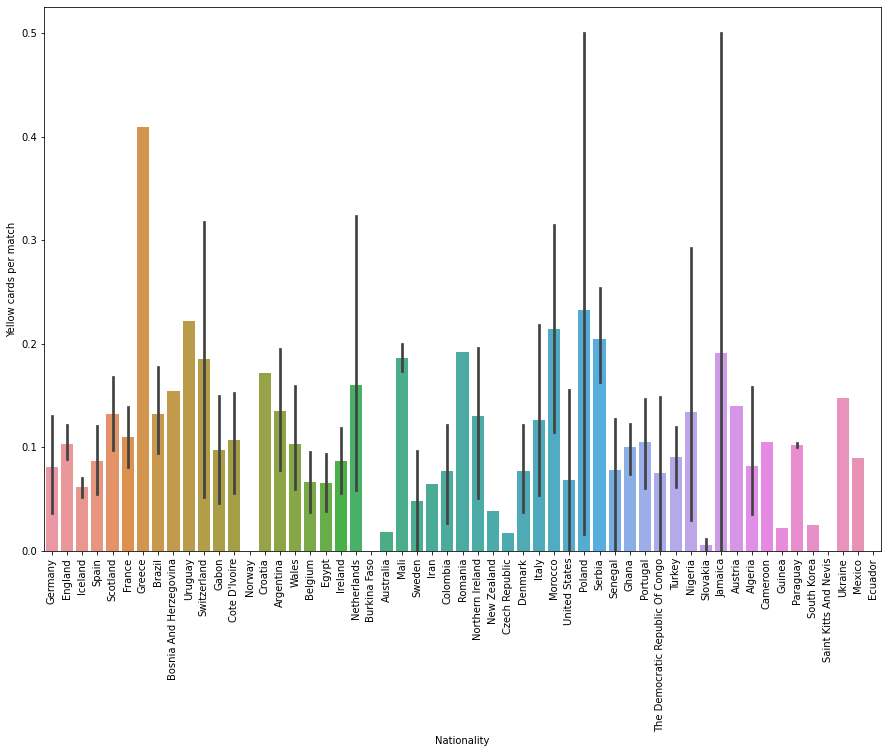

In [36]:

plt.figure(figsize =(15, 10))
plt.xticks(rotation=90)
ax = sns.barplot(x="Nationality", y="Yellow cards per match", data=df)


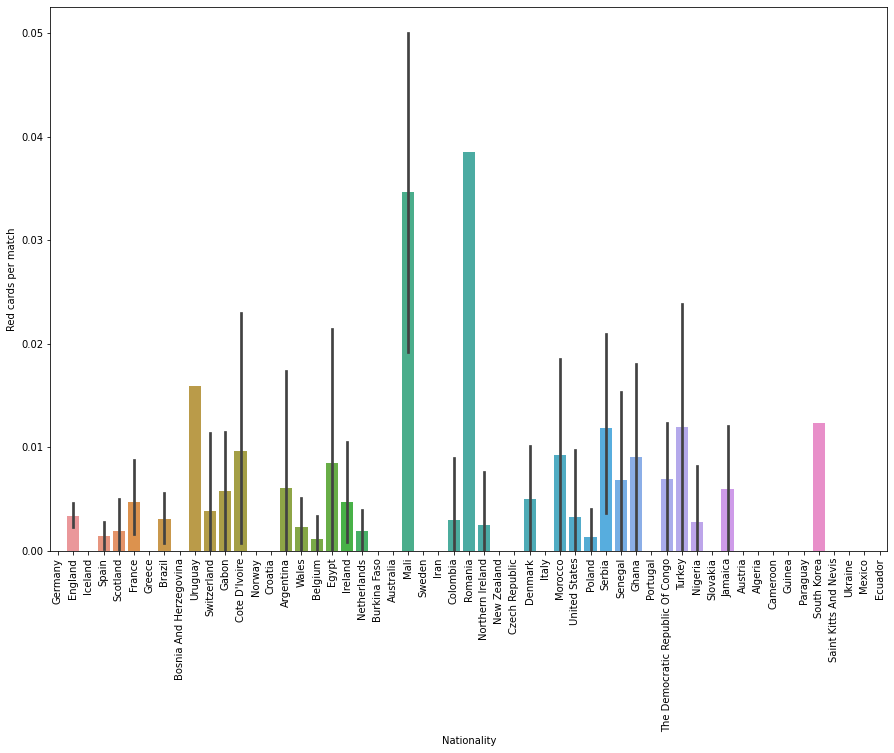

In [37]:
plt.figure(figsize =(15, 10))
plt.xticks(rotation=90)
ax = sns.barplot(x="Nationality", y="Red cards per match", data=df)

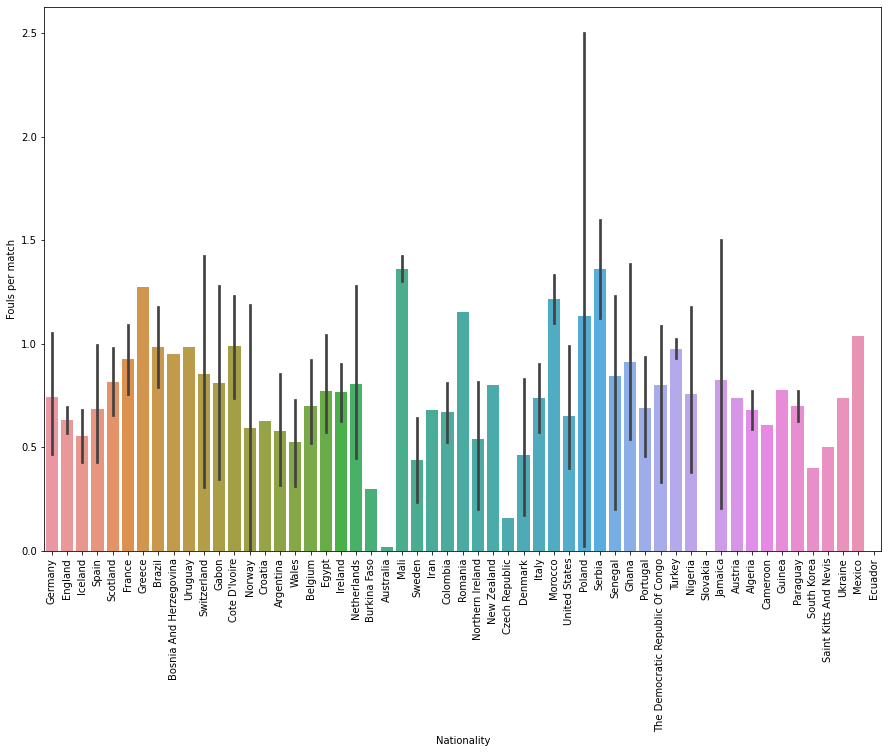

In [38]:
plt.figure(figsize =(15, 10))
plt.xticks(rotation=90)
ax = sns.barplot(x="Nationality", y="Fouls per match", data=df)

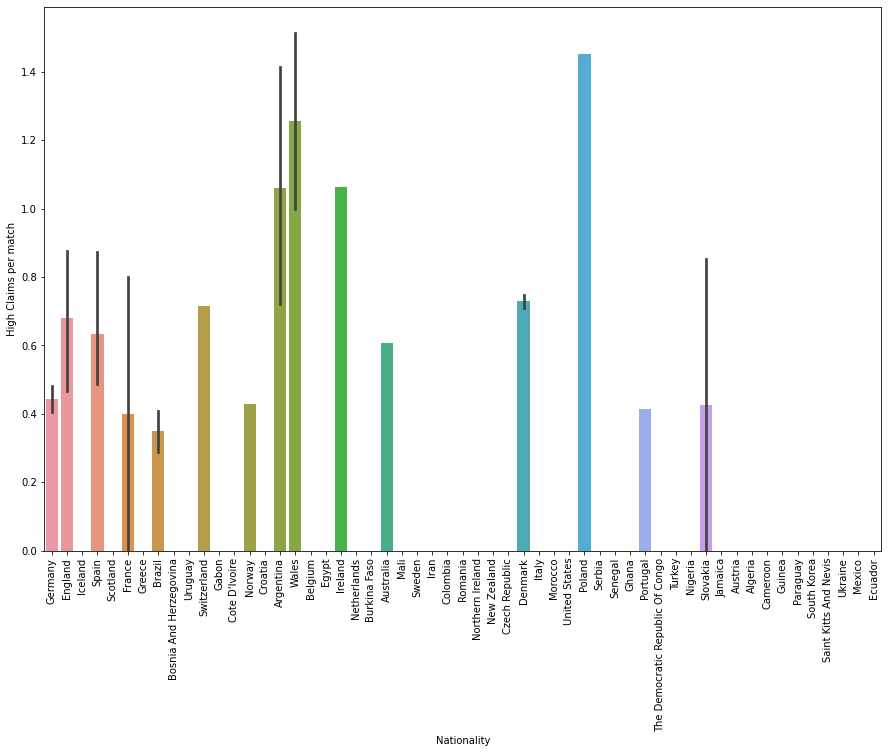

In [39]:
plt.figure(figsize =(15, 10))
plt.xticks(rotation=90)
ax = sns.barplot(x="Nationality", y="High Claims per match", data=df)

### Como tenemos en cuenta si un jugador es mas antideportivo que otro 

#### High Claims per match.
#### Yellow cards per match.
#### Red cards per match.
#### Fouls per match.

### creamos una metrica para determinarlo

#### puntaje antideportivo = Yellow cards per match * 1,5 +  High Claims per match *1,5 + Red cards per match * 2,5 + Fouls per match

#### El que cuente con un numero mayor será considerado el más antideportivo

In [40]:
df["Yellow cards per match"].fillna(0, inplace = True)
df["High Claims per match"].fillna(0, inplace = True)
df["Red cards per match"].fillna(0,inplace= True)
df["Fouls per match"].fillna(0,inplace= True)

In [41]:
df["puntaje antideportivo"]=df["Yellow cards per match"]*1.5 + df["High Claims per match"]*1.5 + df["Red cards per match"]*2.5 +df["Fouls per match"]

In [42]:
df.head()

Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances  Wins  Losses  Goals  Goals per match  Headed goals  \
0           64    28      16      0              0.0           NaN   
1            0     0       0      0              0.0           NaN   
2            0     0       0      0              0.0           NaN   
3          160    90      37      7              0.0           0.0   
4           16     7       5      1              0.0           0.0   

   Goals with right foot  Goals with left foot  Penalties scored  \
0                    0.0                   0.0               NaN   
1                    0.0                   0.0               NaN   
2                    0.0                   0.0               NaN   
3                    4.0                   3.0               NaN   
4                    0.0                   1.0               NaN   

   Freekicks scored  Shots  Shots on target Shooting accuracy %  Hit woodwork  \
0               0.0    0.0              0.0                 NaN           0.0   
1               0.0    0.0              0.0                 NaN           0.0   
2               0.0    0.0              0.0                 NaN           0.0   
3               0.0    0.0              0.0                 NaN           3.0   
4               0.0    0.0              0.0                 NaN           0.0   

   Big chances missed  Clean sheets  Goals conceded  Tackles Tackle success %  \
0                 0.0          14.0            82.0      NaN              NaN   
1                 0.0           0.0             0.0      NaN              NaN   
2                 0.0           0.0             0.0      NaN              NaN   
3                 0.0          53.0           166.0    214.0              78%   
4                 0.0           2.0            16.0     21.0              81%   

   Last man tackles  Blocked shots  Interceptions  Clearances  \
0               NaN            NaN            NaN         NaN   
1               NaN            NaN            NaN         NaN   
2               NaN            NaN            NaN         NaN   
3               1.0           32.0          208.0       304.0   
4               0.0            1.0           12.0        32.0   

   Headed Clearance  Clearances off line  Recoveries  Duels won  Duels lost  \
0               NaN                  NaN         NaN        NaN         NaN   
1               NaN                  NaN         NaN        NaN         NaN   
2               NaN                  NaN         NaN        NaN         NaN   
3             143.0                  3.0       732.0      611.0       709.0   
4              12.0                  0.0        63.0       55.0        38.0   

   Successful 50/50s  Aerial battles won  Aerial battles lost  Own goals  \
0                NaN                 NaN                  NaN        0.0   
1                NaN                 NaN                  NaN        0.0   
2                NaN                 NaN                  NaN        0.0   
3              196.0               161.0                215.0        1.0   
4               12.0                10.0                 16.0        0.0   

   Errors leading to goal  Assists  Passes  Passes per match  \
0                     7.0        0    1783             27.86   
1                     0.0        0       0              0.00   
2                     0.0        0       0              0.00   
3                     1.0       18    7125             44.53   
4                     0.0        1     519             32.44   

   Big chances creat

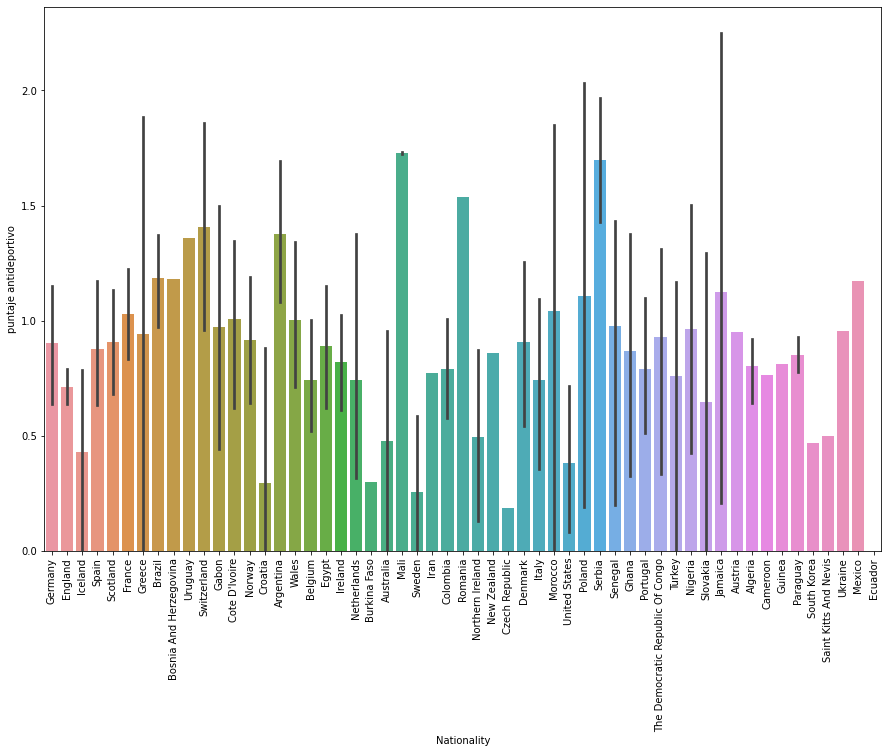

In [43]:
plt.figure(figsize =(15, 10))
plt.xticks(rotation=90)
ax = sns.barplot(x="Nationality", y="puntaje antideportivo", data=df)

## podemos notar en esta grafica que wales tiene un puntaje de antideportividad mayor, por lo que respondemos que no a nuestra pregunta planteada anteriormente